In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [2]:
# quantum circuit to make a Bell state 
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 486, '00': 514}


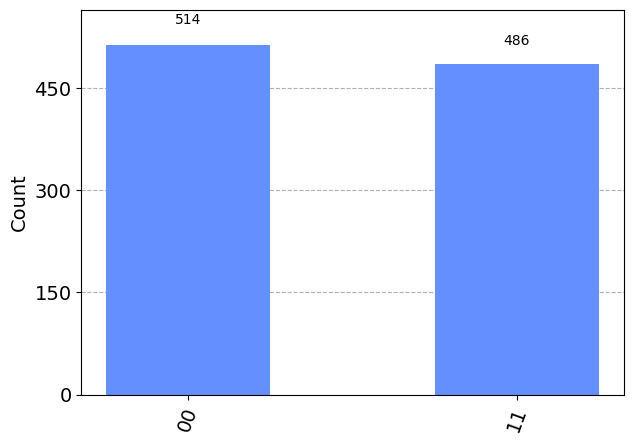

In [3]:
plot_histogram(counts)

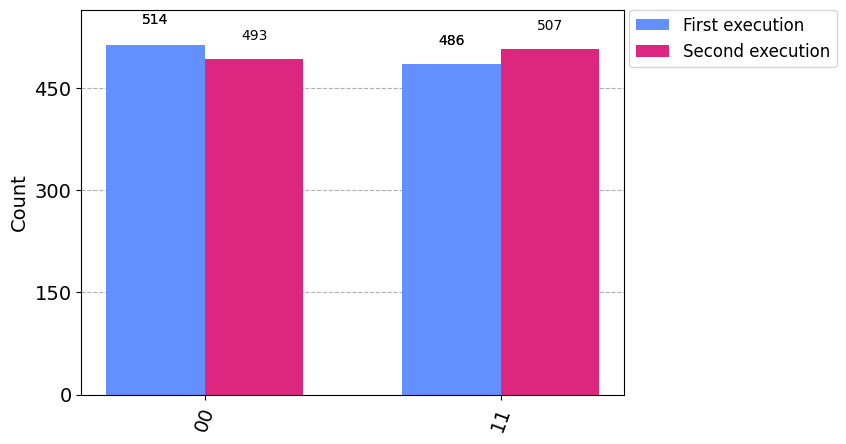

In [4]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

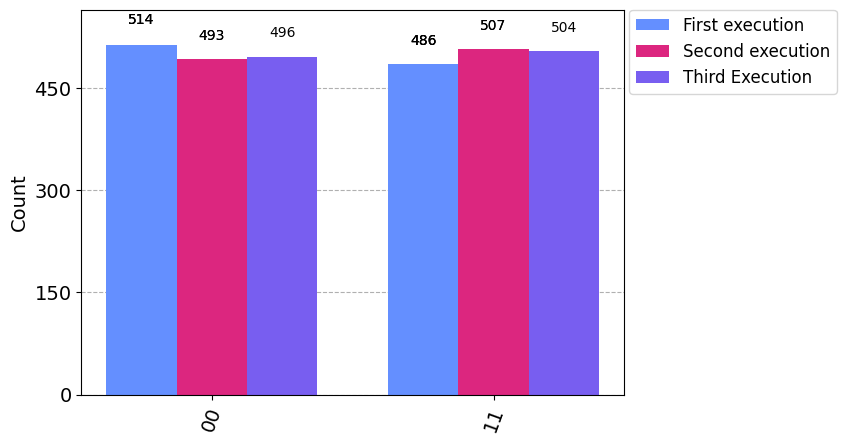

In [5]:
# Execute 2-qubit Bell state again
third_result = backend.run(transpile(circ, backend), shots=1000).result()
third_counts  = third_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution', 'Third Execution']
plot_histogram([counts, second_counts, third_counts], legend=legend)

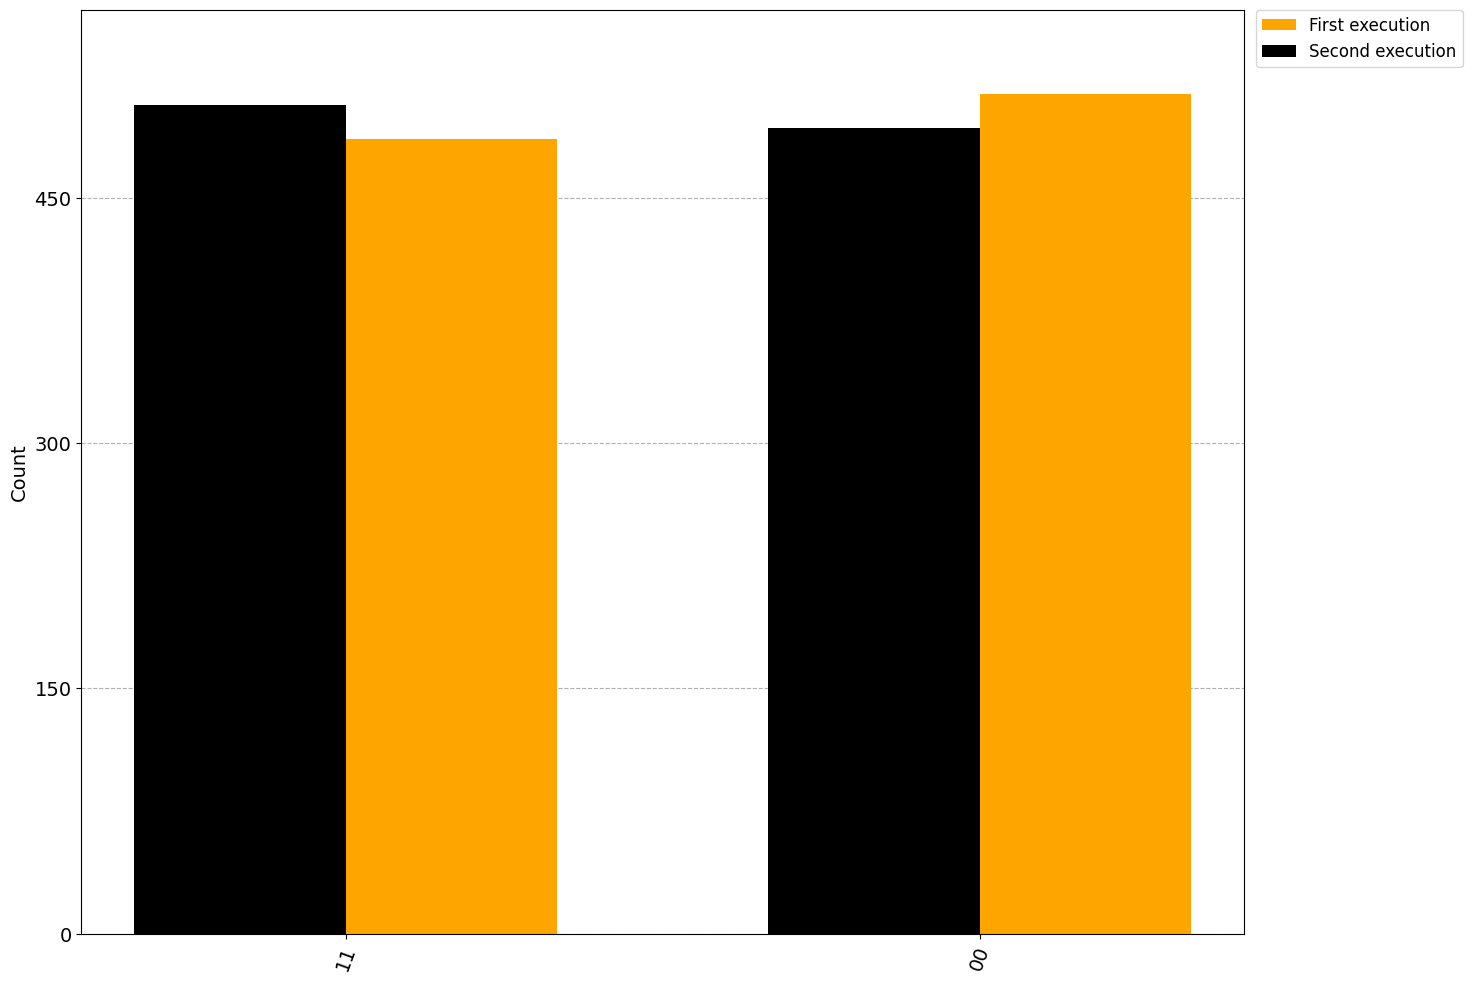

In [6]:
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12), 
               color=['orange', 'black'], bar_labels=False)

In [7]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)

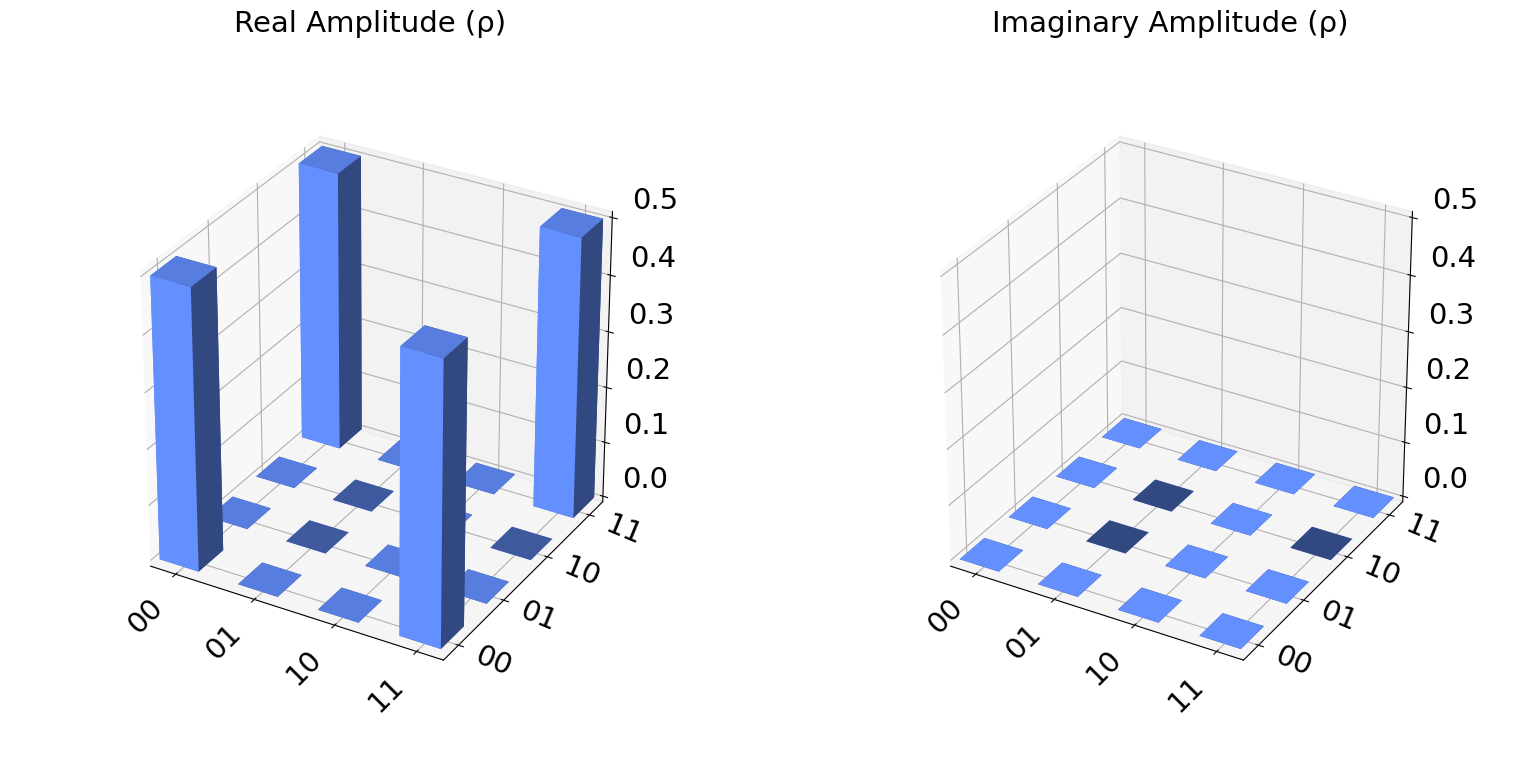

In [8]:
plot_state_city(psi)

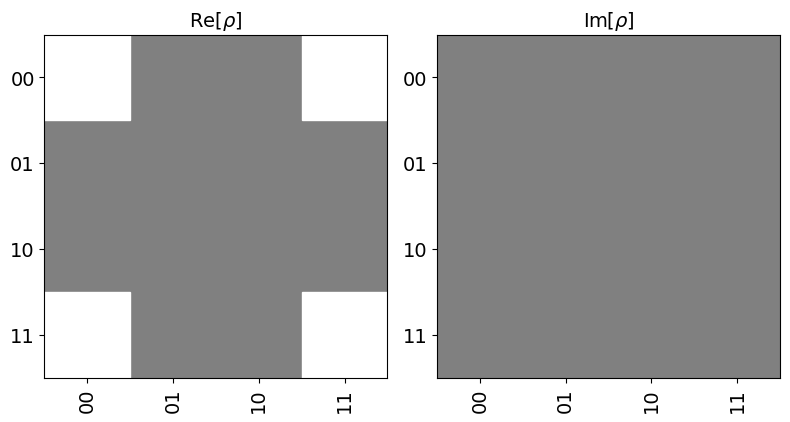

In [9]:
plot_state_hinton(psi)

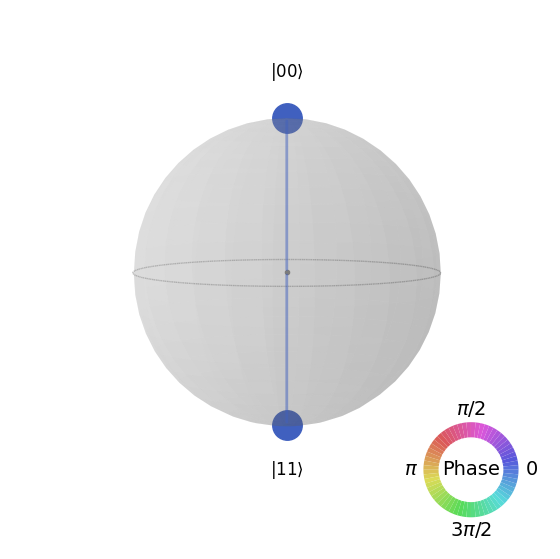

In [10]:
plot_state_qsphere(psi)

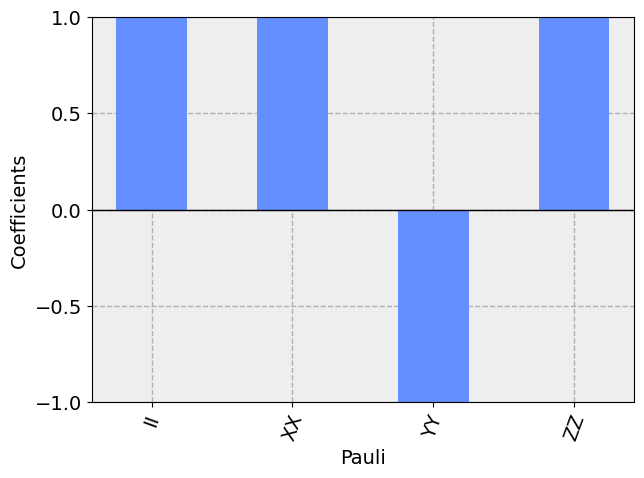

In [11]:
plot_state_paulivec(psi)

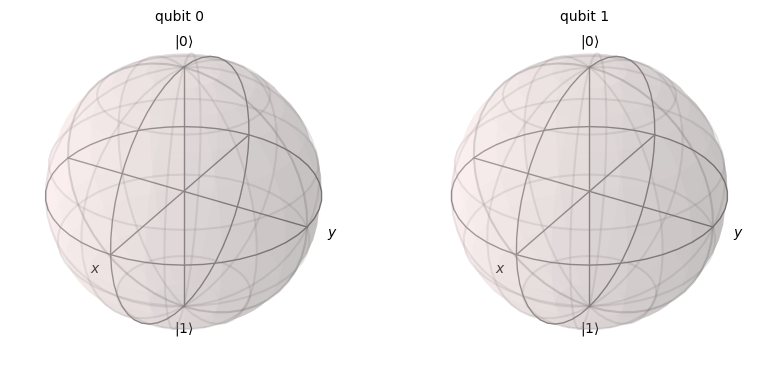

In [12]:
plot_bloch_multivector(psi)